In [143]:
import snap
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# 2 Structural Roles: Rolx and ReFex

In [16]:
Graph = snap.TUNGraph.Load(snap.TFIn("hw1-q2.graph"))

## 2.1 Basic Features

In [21]:
count_nodes = Graph.GetNodes()
count_features = 3
features = np.zeros((count_nodes, count_features))

In [28]:
result_degree = snap.TIntV()
snap.GetDegSeqV(Graph, result_degree)
for i in range(0, result_degree.Len()):
    features[i][0] = result_degree[i]

In [61]:
for node_0 in Graph.Nodes():
    node_id_0 = node_0.GetId()
    neighbors = snap.TIntV()
    snap.GetNodesAtHop(Graph, node_id_0, 1, neighbors, False)
    neighbors.Add(node_id_0)

    edges_in_egonet = 0
    for neighbor_0 in neighbors:
        for neighbor_1 in neighbors:
            if Graph.IsEdge(neighbor_0, neighbor_1):
                edges_in_egonet += 1
    edges_in_egonet = edges_in_egonet / 2
    features[node_id_0][1] = edges_in_egonet
    
    edges_egonet_rest = 0
    for edge in Graph.Edges():
        src_id, dst_id = edge.GetId()
        if ((src_id in neighbors and dst_id not in neighbors) or 
            (dst_id in neighbors and src_id not in neighbors)):
            edges_egonet_rest += 1
    features[node_id_0][2] = edges_egonet_rest

In [67]:
def cosine_similarity(x, y):
    res = x.dot(y) / (np.linalg.norm(x)*np.linalg.norm(y))
    return res

In [97]:
i = 9
x = features[i]
res = (features.dot(x) / 
       (np.linalg.norm(features, axis=1) * np.linalg.norm(x)))
isnan = np.isnan(res)
res[isnan] = 0
res = np.delete(res, i, 0)

/home/alex/base/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [102]:
top_5_sim = np.argpartition(res, -5)[-5:]
print(f'Feature vector for node {i}: {features[i]}')
print(f'Top 5 node similar no node {i}:')
for node_id in top_5_sim:
    print(f'Node {node_id}: {res[node_id]}')

Feature vector for node 9: [ 6. 10.  1.]
Top 5 node similar no node 9:
Node 1053: 0.9961182380000687
Node 287: 0.996343680627828
Node 285: 0.996343680627828
Node 414: 0.9996157540684272
Node 1335: 0.9961182380000687


## 2.2 Recursive Features

In [136]:
K = 2
features_rec = np.copy(features)
count_nodes = Graph.GetNodes()
for i in range(K):
    features_sum = np.zeros((count_nodes, 3**(i+1)))
    features_mean = np.zeros((count_nodes, 3**(i+1)))
    for node in Graph.Nodes():
        node_id = node.GetId()
        neighbors = snap.TIntV()
        snap.GetNodesAtHop(Graph, node_id, 1, neighbors, False)
        neighbors_ids = [n for n in neighbors]

        mean_feat = features_rec[neighbors_ids].mean(axis=0)
        sum_feat = features_rec[neighbors_ids].sum(axis=0)
        features_mean[node_id] = mean_feat
        features_sum[node_id] = sum_feat
        
    features_rec = np.hstack((features_rec, features_mean))
    features_rec = np.hstack((features_rec, features_sum))


/home/alex/base/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice.
  app.launch_new_instance()


In [139]:
i = 9
x = features_rec[i]
res = (features_rec.dot(x) / 
       (np.linalg.norm(features_rec, axis=1) * np.linalg.norm(x)))
isnan = np.isnan(res)
res[isnan] = 0
res = np.delete(res, i, 0)

In [142]:
top_5_sim = np.argpartition(res, -5)[-5:]
# print(f'Feature vector for node {i}: {features_rec[i]}')
print(f'Top 5 node similar no node {i}:')
for node_id in top_5_sim:
    print(f'Node {node_id}: {res[node_id]}')

Top 5 node similar no node 9:
Node 24: 0.9922413199302672
Node 495: 0.9922839741918226
Node 414: 0.993728442523926
Node 972: 0.9959848829010806
Node 536: 0.994613004402056


## Role Discovery

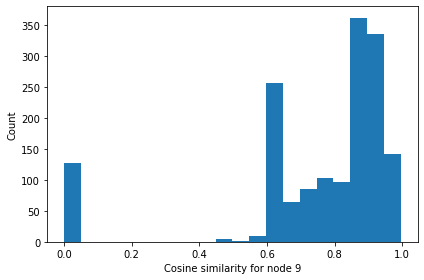

In [153]:
plt.hist(res, bins=20)
plt.xlabel('Cosine similarity for node 9')
plt.ylabel('Count')
plt.tight_layout()
plt.show()